# `Matplotlib annotations`

In [1]:
import pandas as pd
import duckdb
df = pd.read_csv('data/1900-census-immigrant-pop-metro.csv')

In [2]:
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [19]:
df["Total foreign born"].iloc[0]

'7,127'

In [20]:
type(df[["Sweden", "Norway"]])

pandas.core.frame.DataFrame

In [21]:
df["Sweden"]

0        200
1         65
2        186
3          5
4         32
       ...  
156       45
157    7,542
158      289
159       10
160      343
Name: Sweden, Length: 161, dtype: object

In [22]:
type(df["Sweden"])

pandas.core.series.Series

In [40]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]
df_nordic = df[columns]
df_nordic.head()


,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"


In [ ]:
df_nordic = df_nordic.fillna("0") # replace all NaN 

In [42]:
# TO DO: remove , from strings that use it as thousand separator
for column in columns:
    df_nordic[column] = df_nordic[column].str.replace(",","").astype(int)

In [45]:
df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,7127
1,65,12,3,21,17718
2,186,9,5,15,30216
3,5,2,0,5,2991
4,32,4,3,5,3301
...,...,...,...,...,...
156,45,2,52,3,12518
157,7542,269,1143,153,37652
158,289,46,6,81,14634
159,10,1,0,0,1304


In [46]:
df_nordic[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sweden              161 non-null    int64
 1   Norway              161 non-null    int64
 2   Finland             161 non-null    int64
 3   Denmark             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


## FROM START 

In [47]:
import pandas as pd 
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]

df_nordic = df_nordic.fillna("0")

for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [53]:
df_nordic = duckdb.query("""--sql
        WITH nordic AS (
        FROM df 
            SELECT 
                state, 
                SUM("Total foreign born") as "Total foreigners", 
                SUM("Sweden") as Swedes, 
                SUM("Norway") as Norwegians, 
                SUM("Denmark") as Danish, 
                SUM("Finland") as Finnish, 
            GROUP BY
                state
        )
        FROM nordic n
        SELECT 
            *,
            n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
        ORDER BY 
            nordic
        DESC
             
""").df()

df_nordic.head(10)

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0
5,California,160828.0,7223.0,2729.0,3082.0,986.0,14020.0
6,Washington,40868.0,5150.0,3686.0,1193.0,603.0,10632.0
7,Pennsylvania,514506.0,5986.0,861.0,1210.0,378.0,8435.0
8,Nebraska,34456.0,4864.0,457.0,2888.0,11.0,8220.0
9,Connecticut,101502.0,6647.0,273.0,1144.0,41.0,8105.0


In [55]:
df_nordic.shape

(39, 7)

## TO DO:
- more visualizations on Nordic
- more on Total foreigners
- bar charts for different states
- compare nordic to total foreigners

# ANNOTATIONS

In [58]:
top_3_nordic = (
    df_nordic.drop(["Nordic", "Total foreigners"], axis=1).set_index("State").head(3)
)
top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


<Axes: xlabel='State'>

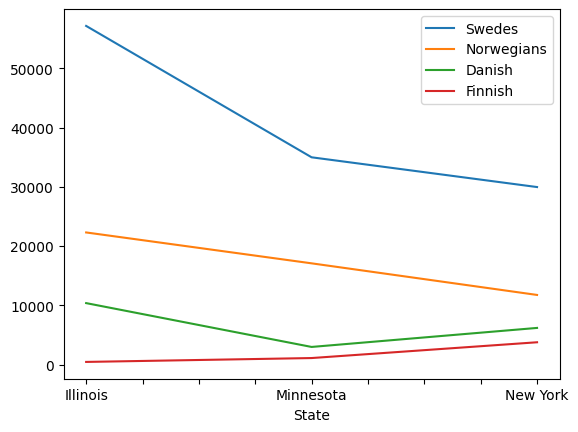

In [62]:
top_3_nordic.plot() #default does not make sense

<Axes: xlabel='State'>

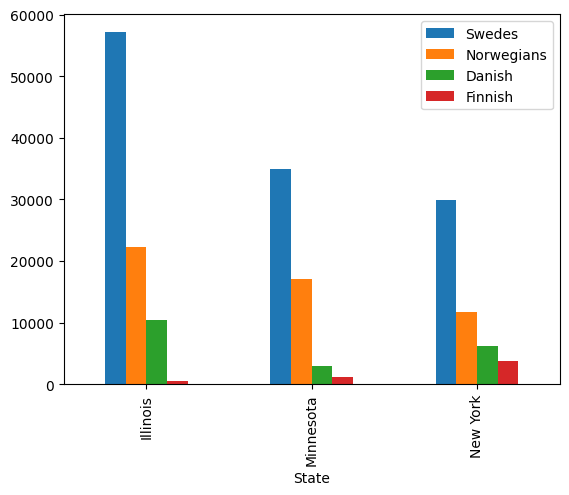

In [63]:
top_3_nordic.plot(kind="bar") # bar makes more sense

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

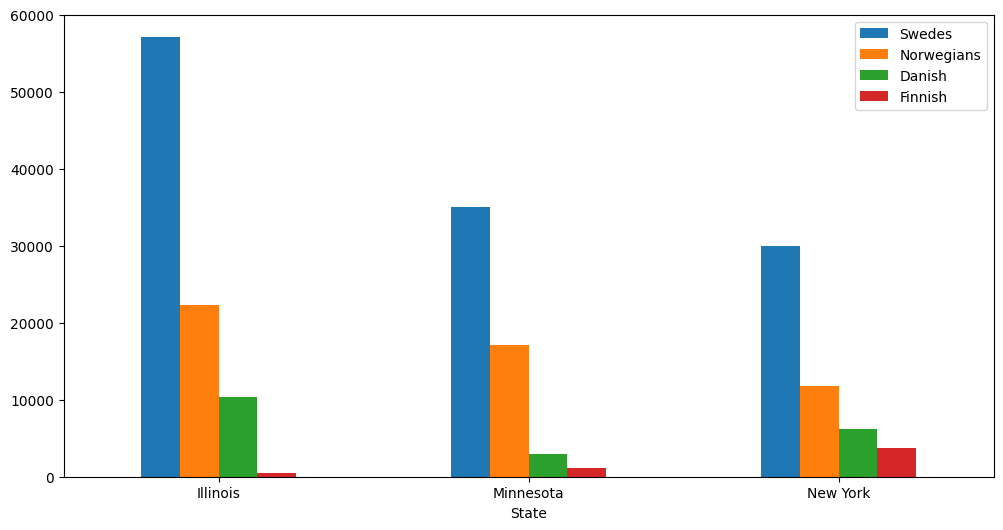

In [64]:
import matplotlib.pyplot as plt


def nordic_plot():

    ax = top_3_nordic.plot(kind="bar", figsize=(12, 6))
    ax.set_xticklabels(top_3_nordic.index, rotation=0)

    fig = ax.get_figure()
    return fig, ax


nordic_plot()


[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

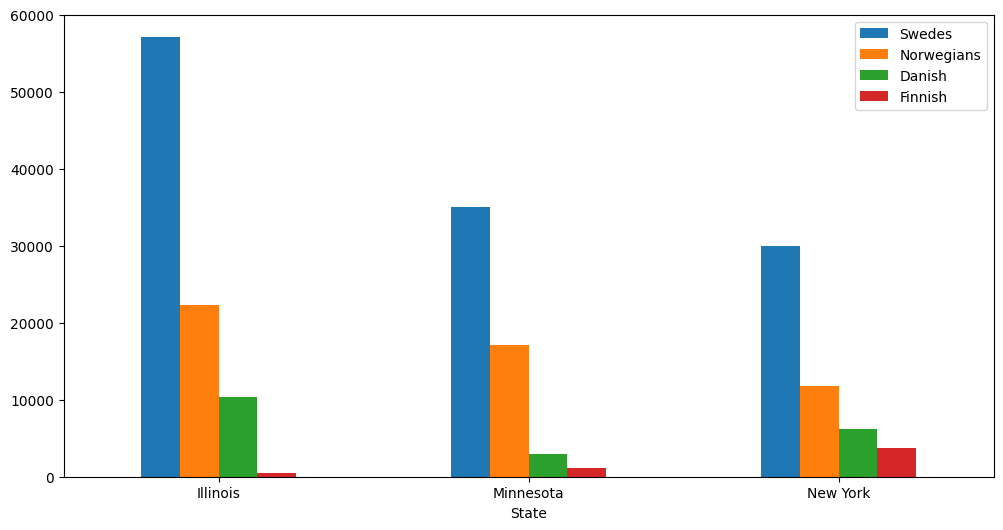

In [65]:
fig, ax = nordic_plot()

ax.containers

In [66]:
ax.containers[0]

<BarContainer object of 3 artists>

In [72]:
ax.containers[0][1].get_height(),ax.containers[0][1].get_x()

(np.float64(34984.0), np.float64(0.75))

# Annotate with arrow

Text(0.8, 42000, 'Swedes')

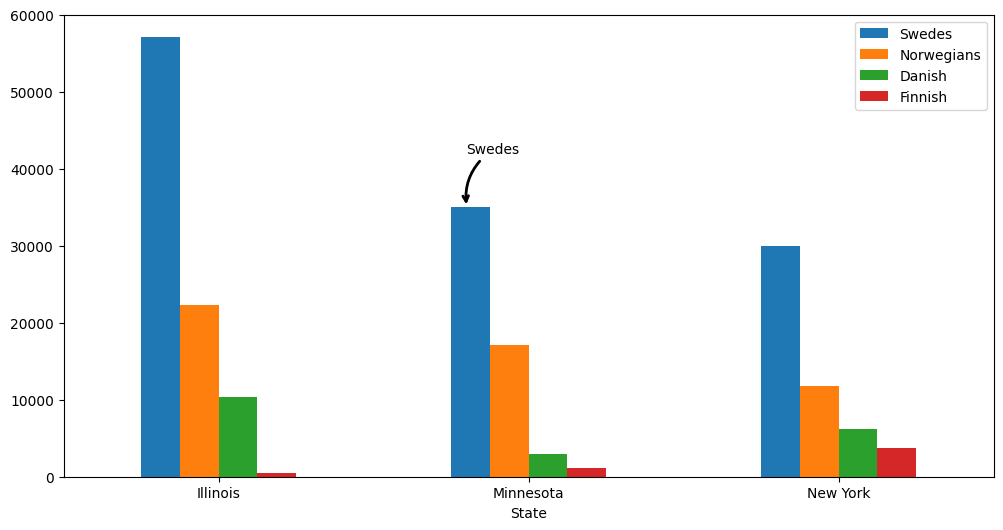

In [83]:
fig, ax = nordic_plot()
arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text= "Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(.8, 42000))

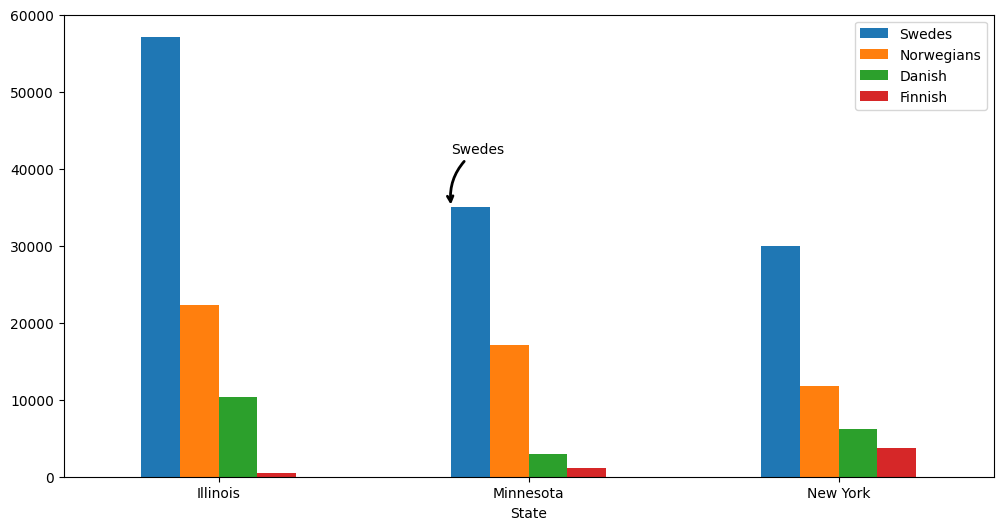

In [88]:
fix, ax = nordic_plot()

def annotate_nordic(bar_artist, text, x_offset, y_offset):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
    ax.annotate(
        text= text, 
        xy=xy, 
        arrowprops=arrowprops, 
        xytext=(xy[0] + x_offset, xy[1] + y_offset))

annotate_nordic(ax.containers[0][1], "Swedes", 0, 7000)

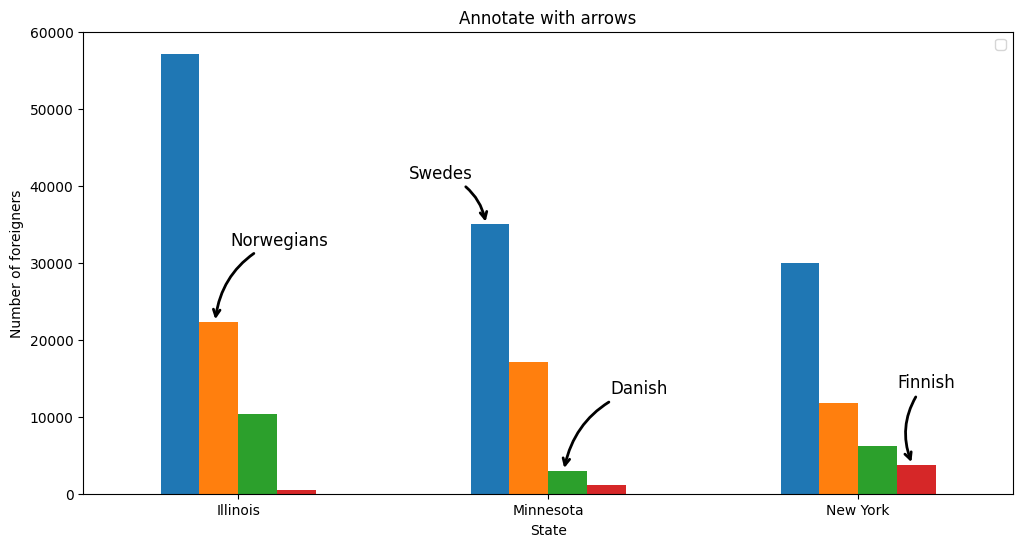

In [ ]:
fix, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers
# which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )


annotate_nordic(swede_bars[1], "Swedes", x_offset=-0.2, y_offset=6000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

ax.set(title = "Annotate with arrows", ylabel="Number of foreigners")
ax.legend("")